## <b>■ 텐서 플로우 복습</b>
    1. 텐서 플로우 1.x                              그래프 생성 영역
    2. 텐서 플로우 1.x + keras 2.x                  그래프 실행 영역
    --------------------------------------------------------------------------------------------------------------
    3. 텐서 플로우 2.x                       즉시 실행모드(as 파이썬), 일반 파이썬 코드를 수행할 때 GPU를 사용할 수 있음 (@tf.function)
    
### <b>□ 분류 학습을 위해 신경망에 입력한 이미지들</b>
        1. mnist
        2. 이파리
        3. cifar10
        4. Fashion-mnist
        5. 직접 스크롤링한 사진들 ------ 신경망 활용 홈페이지
        
### <b>■ mnist이미지를 tensorflow 2.x 신경망에 넣고 학습</b>
    1. cnn을 이용하지 않은 코드
    2. cnn을 이용한 코드
    
    본인이 만든 포트폴리오의 머신러닝과 딥러닝 성능을 확인하기 위해 정확도 말고 다른 척도를 뭐를 가지고 확인? (object detection)
        1. 민감도
        2. 특이도
        3. 정밀도
        4. 재현율
        
#### 어제 생성한 mnist 모델의 성능을 평가하시오
    어제 마지막 문제 코드 맨 아래쪽에 아래의 코드를 추가
    print(model.evaluate(x_test, x_val))

In [2]:
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams.update({'font.size':13})

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
print(x_train.shape, y_train.shape)
print(y_train)
print(x_test.shape, y_test.shape)
print(y_test)

sample_size = 3
random_idx = np.random.randint(60000, size = sample_size)

# for idx in random_idx:
#     img = x_train[idx, :]
#     label = y_train[idx]
#     plt.figure()
#     plt.imshow(img)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)
print(x_train.shape)
print(x_val.shape)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28*28)))/255
x_val = (x_val.reshape((num_x_val, 28*28)))/255
x_test = (x_test.reshape((num_x_test, 28*28)))/255

print(x_train.shape) # 모델 입력을 위해 데이터를 2차원으로 변경
print(x_val.shape)
print(x_test.shape)

# mnist의 라벨 숫자를 One_Hot_encoding 함수
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# print(y_train)
print(y_test)

model = Sequential()

model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()
#
#
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

print(model.evaluate(x_test, y_test))

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]
(42000, 28, 28)
(18000, 28, 28)
(42000, 784)
(18000, 784)
(10000, 784)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 1s 21us/sample - loss: 0.5009 - acc: 0.8551 - val_loss: 0.2346 - val_acc: 0.9343
Epoch 2/30
42000/42000 [==============================] - 1s 18us/sample - loss: 0.1947 - acc: 0.9438 - val_loss: 0.1755 - val_acc: 0.9501
Epoch 3/30
42000/42000 [==============================] - 1s 18us/sample - loss: 0.1467 - acc: 0.9569 - val_loss: 0.1495 - val_acc: 0.9560
Epoch 4/30
42000/42000 [==============================] - 1s 17us/sample - loss: 0.1169 - acc: 0.9658 - val_loss: 0.1390 - val_acc: 0.9589
Epoch 5/30
42000/42000 [==============================] - 1s 18us/sample - loss: 

### ※ 문제149. mnist 이미지를 학습한 신경망 모델이 x_test 데이터를 입력받아 예측한 숫자가 무엇인지 출력하시오

In [4]:
results = model.predict(x_test)
arg_results = np.argmax(results, axis=1)
print(arg_results)

[7 2 1 ... 4 5 6]


### ※ 문제150. 실제 x_test 데이터의 정답 라벨을 확인해서 x_test의 정답인 y_test의 첫번째 숫자가 7이 맞는지 확인하시오

In [7]:
arg_results2 = np.argmax(y_test, axis=1)
np.argmax(y_test[0])

7

### ※ 문제151. 신경망이 1만개의 mnist 테스트 데이터 숫자 중 몇 개를 맞췄는지 혼동행렬을 그려서 확인하시오

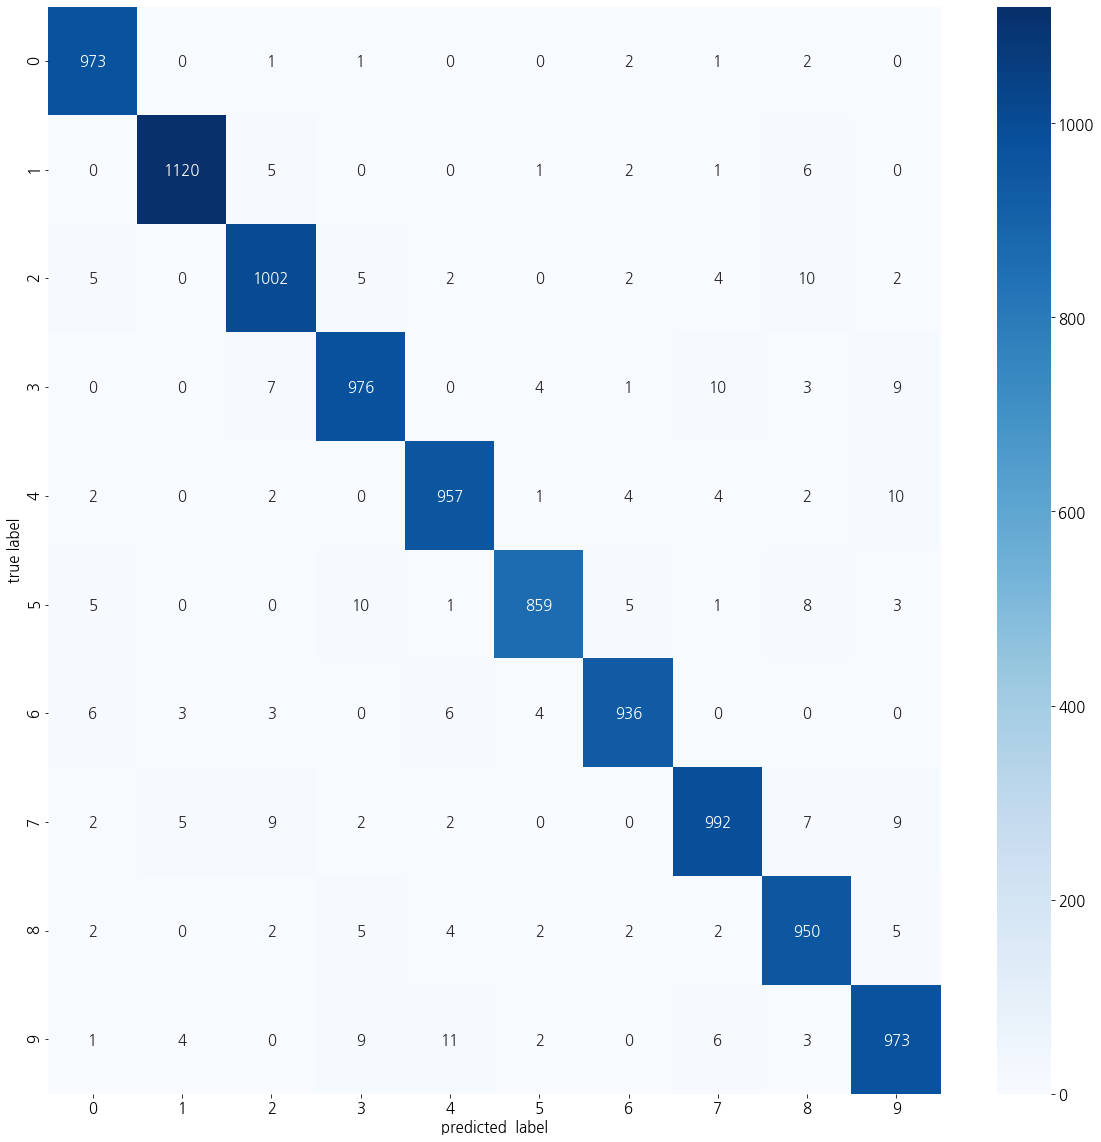

In [15]:
from sklearn.metrics import classification_report,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,20)
plt.rcParams.update({'font.size':15})

cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('predicted  label')
plt.ylabel('true label')
plt.show()

#### <b>※ 정확도 외에 또다른 성능 척도(정밀도, 재현율, f1 score) 보는 방법</b>

In [12]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### <b>■ 반드시 스스로 코드 구현을 연습해야하는 것</b>
    1. 신경망으로 데이터 로드하는 함수
        - 수업: cifar10 (loader2.py)
        - 연습: 이파리 (loader_leaf.py)
    2. 데이터 분류하는 신경망 생성
        - 수업: mnist (파이썬 날코딩 / tensor 1.x / tensor 2.x ) 
        - 연습: fashion mnist
        
### <b>■ Fashion mnist 데이터 소개 및 코드</b>
    Fashion-MNIST 도 MNIST 와 동일하게 60,000 개의 학습 데이터와 10,000 개의 테스트 데이터로 구성되어있습니다.

    레이블 설명
        0 티셔츠/탑
        1 바지
        2 풀오버(스웨터의 일종)
        3 드레스
        4 코트
        5 샌들
        6 셔츠
        7 스니커즈
        8 가방
        9 앵클 부츠
### <b>▩ Fashion-MNIST 데이터셋 불러오기</b>        

(60000, 28, 28) (10000, 28, 28)


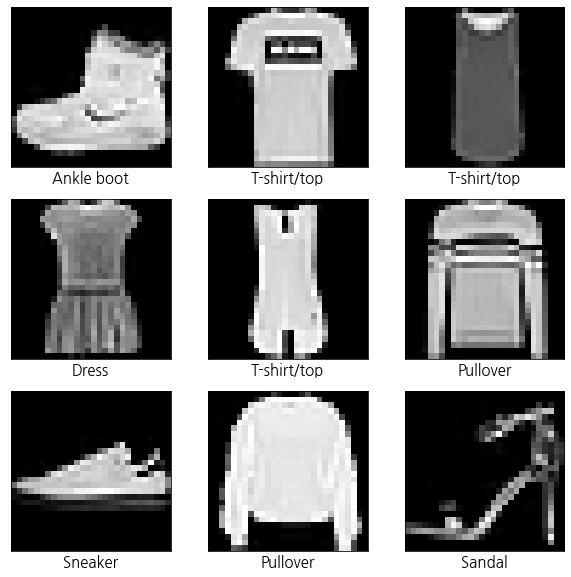

In [17]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
sample_size = 9

# 0 ~ 59999의 범위에서 무작위로 9개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (10, 10))

for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])

plt.show()

### ※ 문제152. 어제 만들었던 mnist 신경망에 Fashion mnist를 넣고 학습을 시키시오

(60000, 28, 28) (60000,)
[9 0 0 ... 3 0 5]
(10000, 28, 28) (10000,)
[9 2 1 ... 8 1 5]
(42000, 28, 28)
(10000, 28, 28)
(18000, 28, 28)
--------------
(42000, 10)
(10000, 10)
(18000, 10)
Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 1s 22us/sample - loss: 0.7056 - acc: 0.7620 - val_loss: 0.5050 - val_acc: 0.8214
Epoch 2/50
42000/42000 [==============================] - 1s 19us/sample - loss: 0.4514 - acc: 0.8414 - val_loss: 0.4132 - val_acc: 0.8561
Epoch 3/50
42000/42000 [==============================] - 1s 19us/sample - loss: 0.4022 - acc: 0.8574 - val_loss: 0.3972 - val_acc: 0.8589
Epoch 4/50
42000/42000 [==============================] - 1s 19us/sample - loss: 0.3766 - acc: 0.8661 - val_loss: 0.3684 - val_acc: 0.8688
Epoch 5/50
42000/42000 [==============================] - 1s 18us/sample - loss: 0.3592 - acc: 0.8706 - val_loss: 0.3691 - val_acc: 0.8701
Epoch 6/50
42000/42000 [==============================] - 1s 19us/samp

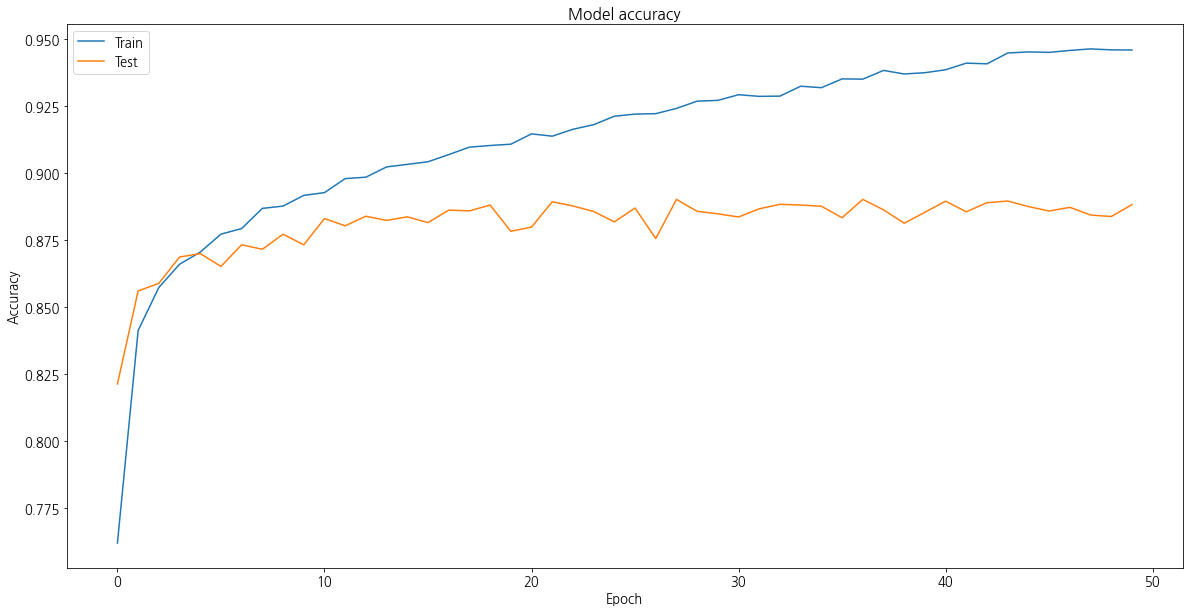

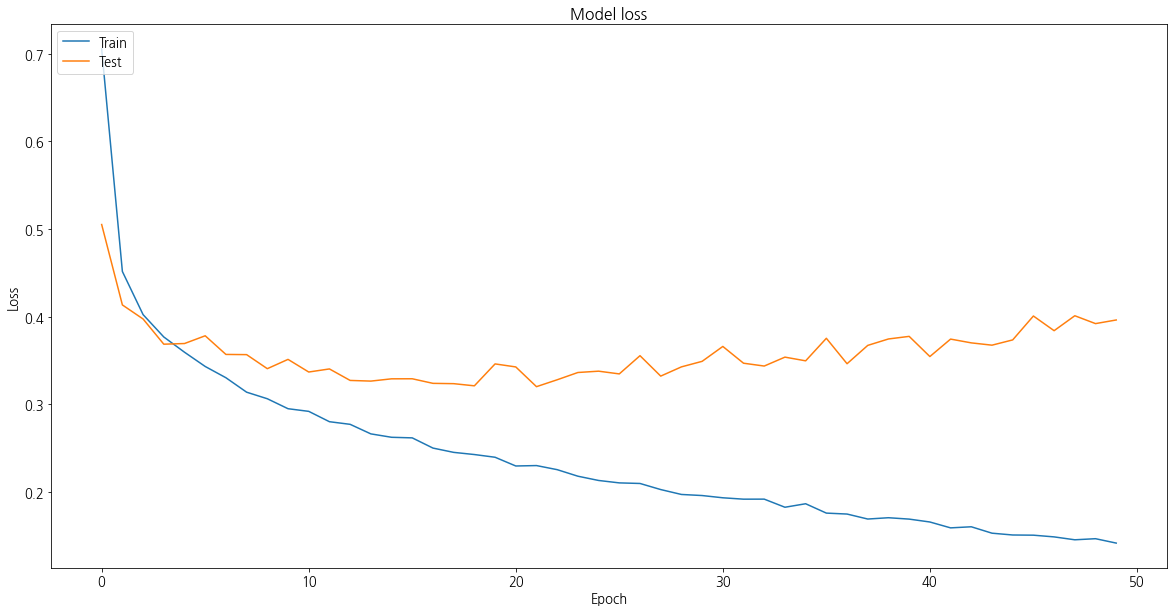

10000/10000 [==============================] - 0s 21us/sample - loss: 0.4494 - acc: 0.8748
[0.4494421382844448, 0.8748]


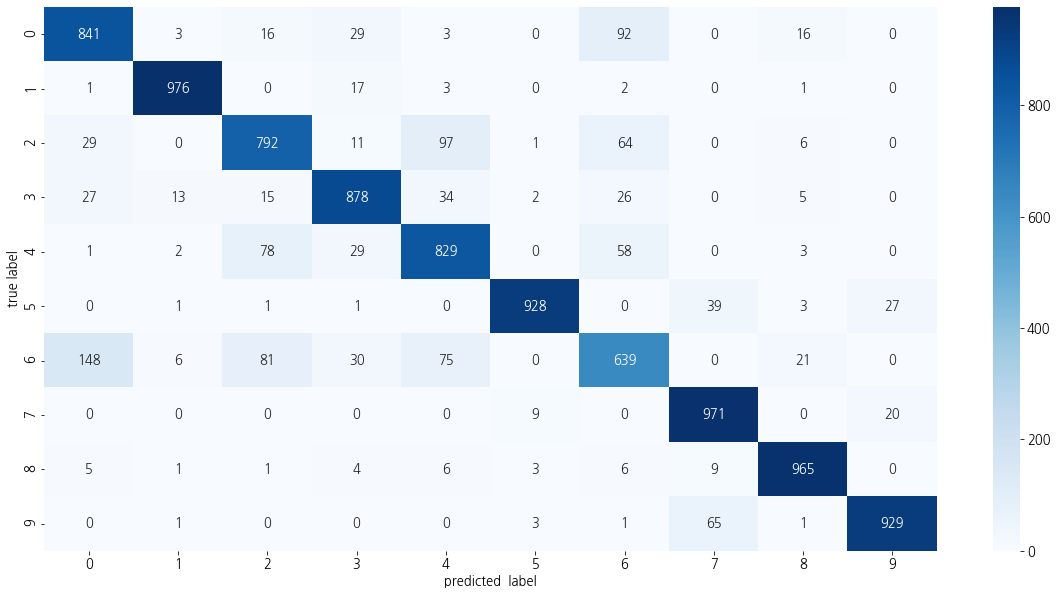

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.97      0.98      0.97      1000
           2       0.80      0.79      0.80      1000
           3       0.88      0.88      0.88      1000
           4       0.79      0.83      0.81      1000
           5       0.98      0.93      0.95      1000
           6       0.72      0.64      0.68      1000
           7       0.90      0.97      0.93      1000
           8       0.95      0.96      0.95      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [19]:

from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams.update({'font.size':13})

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, y_train.shape)
print(y_train)
print(x_test.shape, y_test.shape)
print(y_test)


# for idx in random_idx:
#     img = x_train[idx, :]
#     label = y_train[idx]
#     plt.figure()
#     plt.imshow(img)



# num_x_train = x_train.shape[0]
# num_x_val = x_val.shape[0]
# num_x_test = x_test.shape[0]

# 훈련 데이터 검정을 위해 validation 데이터 생성
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

# 데이터 정규화
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print('--------------')

# 라벨을 One_Hot_encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

# 시각화
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print(model.evaluate(x_test, y_test))

results = model.predict(x_test)
arg_results = np.argmax(results, axis=1)
arg_results2 = np.argmax(y_test, axis=1)
# print(arg_results)
# print(arg_results2)

cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('predicted  label')
plt.ylabel('true label')
plt.show()

# 정확도 외의 다른 성능 척도(정밀도, 재현율, f1 score) 확인
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1)))

### ※ 문제153. 다시 위의 층을 아래와 같이 구성하고 30에폭 돌렸을 때 정확도를 확인하시오
    변경전 : 입력층 ----> 은닉1층 ----> 은닉2층 ----> 출력층
              784          64            32           10
    변경후 : 입력층 ----> 은닉1층 ----> 은닉2층 ----> 은닉3층 ----> 출력층
              784          128           128          32           10

    30에폭 정확도 : 0.87

In [20]:

from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams.update({'font.size':13})

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, y_train.shape)
print(y_train)
print(x_test.shape, y_test.shape)
print(y_test)


# for idx in random_idx:
#     img = x_train[idx, :]
#     label = y_train[idx]
#     plt.figure()
#     plt.imshow(img)



# num_x_train = x_train.shape[0]
# num_x_val = x_val.shape[0]
# num_x_test = x_test.shape[0]

# 훈련 데이터 검정을 위해 validation 데이터 생성
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

# 데이터 정규화
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print('--------------')

# 라벨을 One_Hot_encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

# # 시각화
# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()
#
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

print(model.evaluate(x_test, y_test))

results = model.predict(x_test)

# arg_results = np.argmax(results, axis=1)
# arg_results2 = np.argmax(y_test, axis=1)
# print(arg_results)
# print(arg_results2)

# cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#
# plt.xlabel('predicted  label')
# plt.ylabel('true label')
# plt.show()

# 정확도 외의 다른 성능 척도(정밀도, 재현율, f1 score) 확인
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1)))

(60000, 28, 28) (60000,)
[9 0 0 ... 3 0 5]
(10000, 28, 28) (10000,)
[9 2 1 ... 8 1 5]
(42000, 28, 28)
(10000, 28, 28)
(18000, 28, 28)
--------------
(42000, 10)
(10000, 10)
(18000, 10)
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 1s 33us/sample - loss: 0.6144 - acc: 0.7921 - val_loss: 0.4540 - val_acc: 0.8395
Epoch 2/30
42000/42000 [==============================] - 1s 28us/sample - loss: 0.4075 - acc: 0.8535 - val_loss: 0.3830 - val_acc: 0.8649
Epoch 3/30
42000/42000 [==============================] - 1s 29us/sample - loss: 0.3654 - acc: 0.8659 - val_loss: 0.3550 - val_acc: 0.8744
Epoch 4/30
42000/42000 [==============================] - 1s 27us/sample - loss: 0.3347 - acc: 0.8757 - val_loss: 0.3432 - val_acc: 0.8771
Epoch 5/30
42000/42000 [==============================] - 1s 27us/sample - loss: 0.3126 - acc: 0.8861 - val_loss: 0.3422 - val_acc: 0.8750
Epoch 6/30
42000/42000 [==============================] - 1s 26us/samp

### ※ 문제154. (점심시간 문제) 어제 이파리 keras 신경망 코드를 참고해서 dropout 코드를 fashion mnist 코드에 넣어서 overfitting을 줄이시오

(42000, 28, 28)
(10000, 28, 28)
(18000, 28, 28)
--------------
(42000, 10)
(10000, 10)
(18000, 10)
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 8s 183us/sample - loss: 0.6730 - acc: 0.7558 - val_loss: 0.4638 - val_acc: 0.8389
Epoch 2/30
42000/42000 [==============================] - 7s 174us/sample - loss: 0.4841 - acc: 0.8220 - val_loss: 0.3953 - val_acc: 0.8538
Epoch 3/30
42000/42000 [==============================] - 7s 173us/sample - loss: 0.4429 - acc: 0.8387 - val_loss: 0.3998 - val_acc: 0.8544
Epoch 4/30
42000/42000 [==============================] - 7s 173us/sample - loss: 0.4165 - acc: 0.8479 - val_loss: 0.3593 - val_acc: 0.8741
Epoch 5/30
42000/42000 [==============================] - 7s 173us/sample - loss: 0.4035 - acc: 0.8521 - val_loss: 0.3510 - val_acc: 0.8736
Epoch 6/30
42000/42000 [==============================] - 7s 176us/sample - loss: 0.3856 - acc: 0.8586 - val_loss: 0.3473 - val_acc: 0.8733
Epoch 7/30


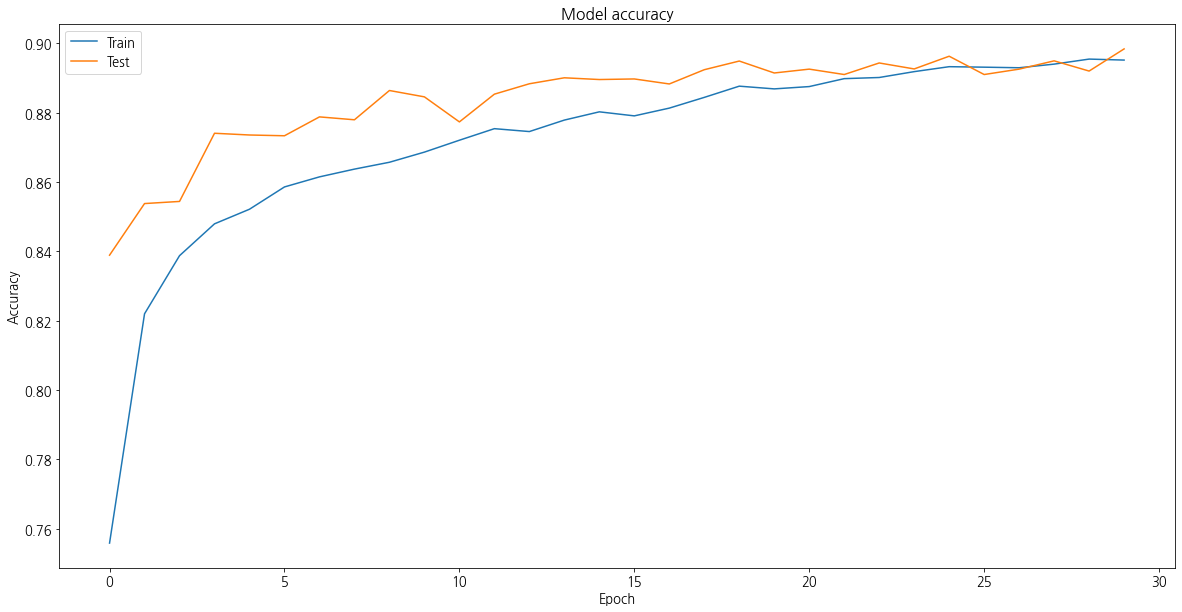

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.83      0.76      0.79      1000
           3       0.87      0.90      0.89      1000
           4       0.76      0.85      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.70      0.67      0.69      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [30]:
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams['figure.figsize']=(20,10)
# plt.rcParams.update({'font.size':13})

(x_train, y_train), (x_test, y_test) = load_data()

# 훈련 데이터 검정을 위해 validation 데이터 생성
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

# 데이터 정규화
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print('--------------')

# 라벨을 One_Hot_encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

print(model.evaluate(x_test, y_test))

# 시각화
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

results = model.predict(x_test)

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1)))

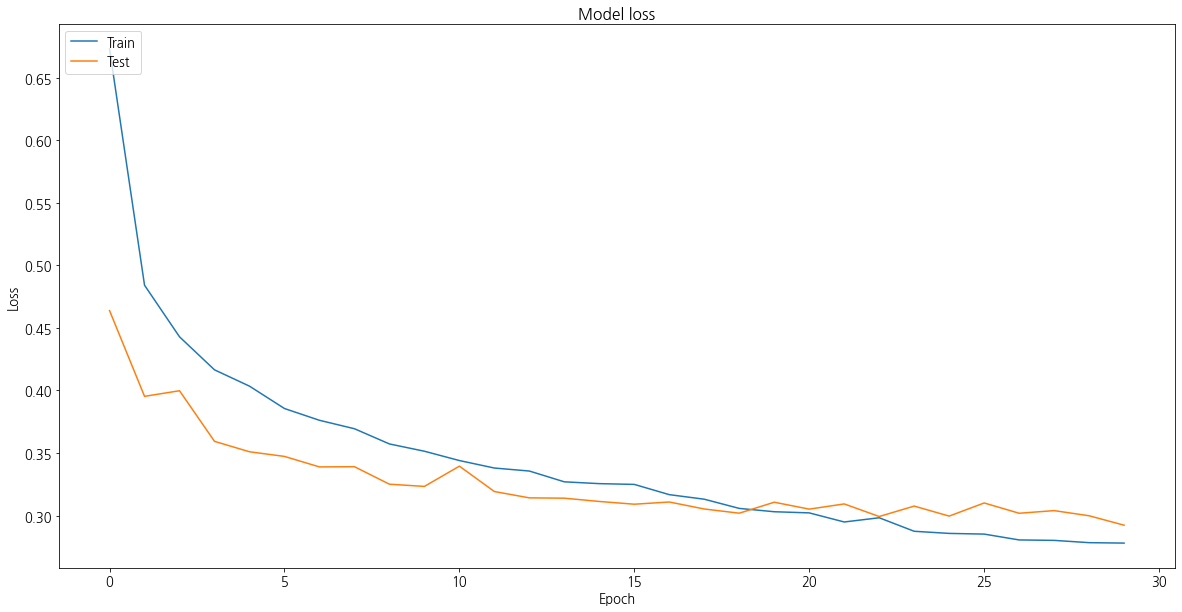

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### <b>■ 텐서 플로우 2.x에서 훈련 시켜서 만든 모델 저장하기와 불러오기</b>
    1. 모델 저장하기

In [34]:
from tensorflow.keras.models import save_model
save_model(model, 'd:/tensor/fashion_mnist.h5')

    2. 모델 불러오기

In [36]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model200 = tf.keras.models.load_model("d:/tensor/fashion_mnist.h5")

# 정확도 확인
print(accuracy_score(model200.predict_classes(x_test), y_test))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
0.8836


### <b>■ 모델의 신경망 구조를 확인하기</b>

In [37]:
model200 = tf.keras.models.load_model("d:/tensor/fashion_mnist.h5")
model200.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_14 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_44 (Dense)             (None, 10)              

### <b>■ tensorflow 2.x에서 CNN층 구현하기</b>
    가장 모범적인 이항분류 신경망 모델인 이파리 신경망을 가져와서 분석

In [38]:
# from keras.datasets import cifar10
# from keras.models import Sequential, save_model
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# import numpy as np
# from keras.utils import np_utils
# from keras.layers.normalization import BatchNormalization
"""
위의 keras 패키지들은 tensorflow안에 전부 구현되어 있어서 import 필요가 없어짐 
"""
# 모듈 import
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Activation
import loader_leaf as loader3

# 하이퍼파라미터 설정
batch_size = 28
num_classes = 2
epochs = 30

# 데이터 위치 설정
train_image = 'D:/data/leafs/images/train_resize/'
test_image = 'D:/data/leafs/images/test_resize/'
train_label = 'D:/data/leafs/images/train_label.csv'
test_label = 'D:/data/leafs/images/test_label.csv'

# 데이터 로드
x_train = loader3.image_load(train_image)
y_train = loader3.label_load(train_label)
x_test = loader3.image_load(test_image)
y_test = loader3.label_load(test_label)

print(loader3.image_load(train_image).shape)
print(loader3.image_load(test_image).shape)
print(loader3.label_load(train_label).shape)
print(loader3.label_load(test_label).shape)

# 모델 구성
model = Sequential()
# 첫번째 층은 반드시 input_shape 지정
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) # x_train.shape[1:] (32,32,3)
"""
mnist와 비교하면 mnist는 첫 층이 완전연결계층이므로 Flatten시켜서 Flatten(input_shape=(28,28))로 입력
Convolution층은 이미지의 형상이 무시되지 않도록 입력해야하므로 3차원(32,32,3)으로 입력(batch_size는 무시)
"""
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 모델 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 데이터 정규화
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 모델 학습
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# 모델 평가
scores = model.evaluate(x_test, y_test, verbose=0)

print("CNN Error: %.2f%%" % (100 - scores[1] * 100))


(19000, 32, 32, 3)
(1000, 32, 32, 3)
(19000, 2)
(1000, 2)
Train on 19000 samples, validate on 1000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
19000/19000 - 127s - loss: 0.6420 - acc: 0.6949 - val_loss: 1.7783 - val_acc: 0.3010
Epoch 2/100
19000/19000 - 128s - loss: 0.5398 - acc: 0.7511 - val_loss: 1.6328 - val_acc: 0.2300
Epoch 3/100


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\knitwill\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-4d91b8b0e735>", line 72, in <module>
    hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), nb_epoch=epochs, batch_size=batch_size, verbose=2)
  File "C:\Users\knitwill\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 780, in fit
    steps_name='steps_per_epoch')
  File "C:\Users\knitwill\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_arrays.py", line 363, in model_iteration
    batch_outs = f(ins_batch)
  File "C:\Users\knitwill\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py", line 3292, in __call__
    run_metadata=self.run_metadata)
  File "C:\Users\knitwill\anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1458, in __call__
    run_metadata_ptr)
KeyboardIn

KeyboardInterrupt: 

### ※ 문제155. 위의 코드는 validation 데이터가 테스트 데이터이므로 훈련중에 사용하는 validation 데이터는 훈련 데이터의 일부 중 25%를 사용할 수 있도록 sklearn의 train_test_split를 사용해서 나누어 훈련시키고 테스트 데이터는 마지막에 evaluate 함수 사용할 때만 쓰게끔 수정하고 돌리시오

In [39]:
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Activation
from sklearn.model_selection import train_test_split
import loader_leaf as loader3

# 하이퍼파라미터 설정
batch_size = 28
num_classes = 2
epochs = 10

# 데이터 위치 설정
train_image = 'D:/data/leafs/images/train_resize/'
test_image = 'D:/data/leafs/images/test_resize/'
train_label = 'D:/data/leafs/images/train_label.csv'
test_label = 'D:/data/leafs/images/test_label.csv'

# 데이터 로드
x_train = loader3.image_load(train_image)
y_train = loader3.label_load(train_label)
x_test = loader3.image_load(test_image)
y_test = loader3.label_load(test_label)

print(loader3.image_load(train_image).shape)
print(loader3.image_load(test_image).shape)
print(loader3.label_load(train_label).shape)
print(loader3.label_load(test_label).shape)

# 모델 구성
model = Sequential()
# 첫번째 층은 반드시 input_shape 지정
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) # x_train.shape[1:] (32,32,3)
"""
mnist와 비교하면 mnist는 첫 층이 완전연결계층이므로 Flatten시켜서 Flatten(input_shape=(28,28))로 입력
Convolution층은 이미지의 형상이 무시되지 않도록 입력해야하므로 3차원(32,32,3)으로 입력(batch_size는 무시)
"""
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 모델 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

# 데이터 정규화
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

# 모델 학습
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

# 모델 평가
scores = model.evaluate(x_test, y_test, verbose=0)

print("CNN Error: %.2f%%" % (100 - scores[1] * 100))

(19000, 32, 32, 3)
(1000, 32, 32, 3)
(19000, 2)
(1000, 2)
Train on 13300 samples, validate on 5700 samples
Epoch 1/10
13300/13300 [==============================] - 161s 12ms/sample - loss: 0.6655 - acc: 0.6826 - val_loss: 0.8556 - val_acc: 0.5075
Epoch 2/10
13300/13300 [==============================] - 156s 12ms/sample - loss: 0.5501 - acc: 0.7404 - val_loss: 0.5637 - val_acc: 0.7077
Epoch 3/10
13300/13300 [==============================] - 159s 12ms/sample - loss: 0.5233 - acc: 0.7632 - val_loss: 0.5350 - val_acc: 0.7493
Epoch 4/10
13300/13300 [==============================] - 162s 12ms/sample - loss: 0.5064 - acc: 0.7747 - val_loss: 0.5454 - val_acc: 0.7477
Epoch 5/10
13300/13300 [==============================] - 161s 12ms/sample - loss: 0.4906 - acc: 0.7911 - val_loss: 0.4887 - val_acc: 0.7847
Epoch 6/10
13300/13300 [==============================] - 161s 12ms/sample - loss: 0.4838 - acc: 0.7913 - val_loss: 0.4900 - val_acc: 0.7804
Epoch 7/10
13300/13300 [=======================

### ※ 문제156. fashion mnist 데이터를 학습시키는데 아래와 같이 CNN으로 구현하시오
    변경전 : 입력층 ----> 은닉1층 ----> 은닉2층 ----> 출력층
              784          64           32           10
    변경후 : 입력층 ----> 은닉1층 ----> 은닉2층 ----> 은닉3층 ----> 출력층
              784          128           128          32           10
    CNN 넣어서 변경한 층
             Conv1 ----> pooling ----> 입력층 ----> 은닉1층 ----> 은닉2층 ----> 은닉3층 ----> 출력층
               64                       784          128           128          32           10

In [57]:
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plt.rcParams['figure.figsize'] = (20, 10)
# plt.rcParams.update({'font.size': 13})

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, y_train.shape)
print(y_train)
print(x_test.shape, y_test.shape)
print(y_test)

# 훈련 데이터 검정을 위해 validation 데이터 생성
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

# 데이터 정규화
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

x_train = x_train.reshape(x_train.shape[0],28,28,-1)
x_test = x_test.reshape(x_test.shape[0],28,28,-1)
x_val = x_val.reshape(x_val.shape[0],28,28,-1)

# 라벨을 One_Hot_encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

model = Sequential()
model.add(Conv2D(3,(3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))
print(model.evaluate(x_test, y_test))

results = model.predict(x_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1)))

(60000, 28, 28) (60000,)
[9 0 0 ... 3 0 5]
(10000, 28, 28) (10000,)
[9 2 1 ... 8 1 5]
(42000, 10)
(10000, 10)
(18000, 10)
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 15s 357us/sample - loss: 1.0201 - acc: 0.6412 - val_loss: 0.5407 - val_acc: 0.8250
Epoch 2/30
42000/42000 [==============================] - 14s 331us/sample - loss: 0.6101 - acc: 0.7866 - val_loss: 0.4174 - val_acc: 0.8503
Epoch 3/30
42000/42000 [==============================] - 14s 325us/sample - loss: 0.5254 - acc: 0.8139 - val_loss: 0.3711 - val_acc: 0.8648
Epoch 4/30
42000/42000 [==============================] - 14s 325us/sample - loss: 0.4836 - acc: 0.8299 - val_loss: 0.3572 - val_acc: 0.8747
Epoch 5/30
42000/42000 [==============================] - 14s 327us/sample - loss: 0.4563 - acc: 0.8387 - val_loss: 0.3418 - val_acc: 0.8798
Epoch 6/30
42000/42000 [==============================] - 14s 326us/sample - loss: 0.4316 - acc: 0.8476 - val_loss: 0.3262 

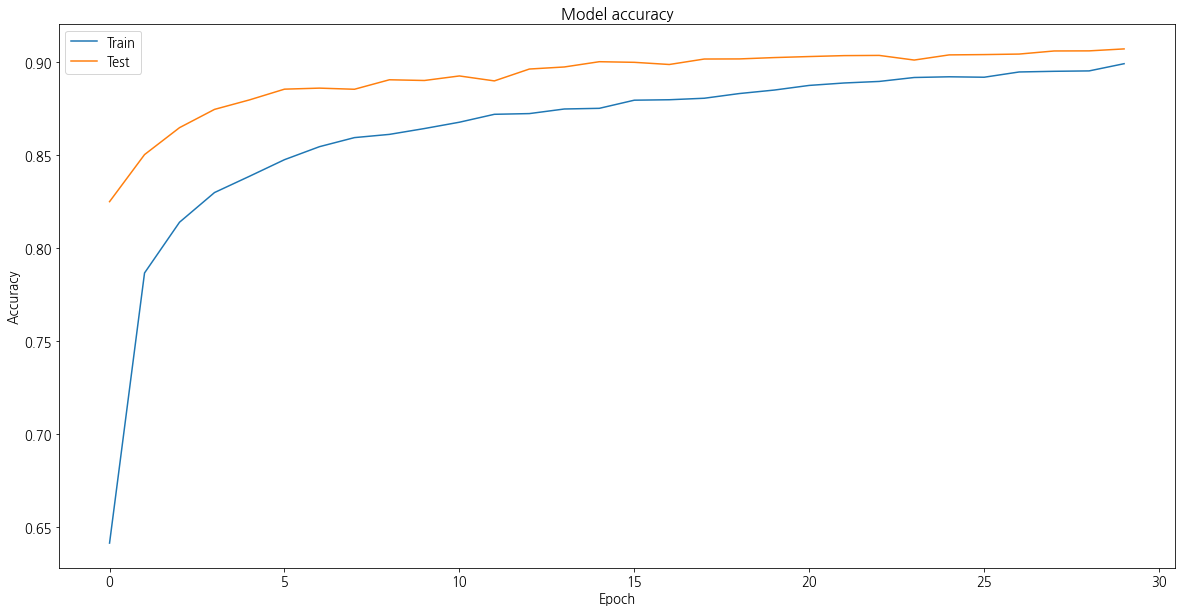

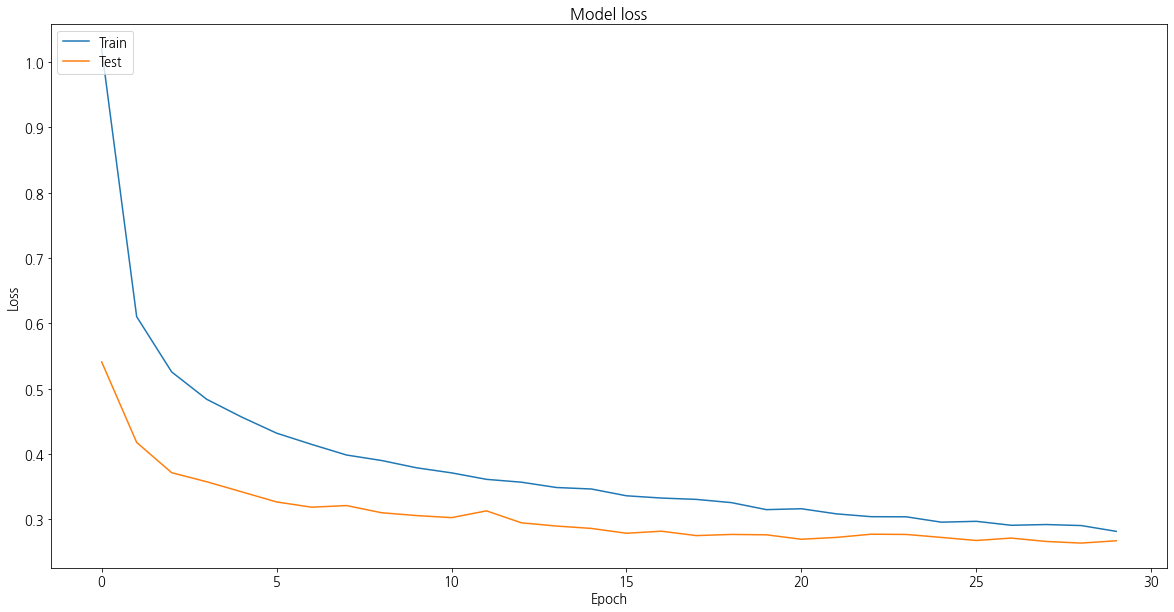

In [59]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### <b>■ 컨볼루션 신경망 </b>

#### ▩ 주석안단 전체 코드:
    아래의 스크립트를 돌리기 전에 pip install pydot , pip install graphviz 를 수행해야합니다. 

In [61]:
!pip install pydot
!pip install graphviz

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 3개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

# 0 ~ 1 범위로 만듭니다.
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

print('Fashion-MNIST ready~')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

# 이전과 다르게 리스트 형태로 층을 구성해볼 수 있습니다.
"""
이전과 다르게 리스트 형태로 층을 구성
모델을 구성하는 코드에서 이전과 다른점은sequential() 함수를 이용하여 모델의 층을 구성
층을 구성할 때 기존에는 add()함수를 사용했는데 Sequential 함수에 리스트 형태로 keras 층을 제공
"""
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),  
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Flatten(), # Dense 층에 입력하기 위해 데이터를 펼쳐줍니다.
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망
])

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.fit(x_train, y_train, 
          epochs = 30, 
          batch_size = 32, 
          validation_data = (x_val, y_val))

model.summary() # 모델의 구조를 확인합니다.

# 각주의 해결 방법을 써도 통하지 않는 다면, 다음 코드의 주석을 풀어 실행시키세요.
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

### <b>■ keras callback 기능</b>
    keras callback은 모델의 학습방향, 저장시점, 학습정지 시점 등에 관한 상황을 모니터링 하기위해 주로 사용
    
    학습중에 가장 오버피팅이 적고 정확도가 높을 때 멈춰서 모델을 저장
    
        1. ModelCheckpoint callback 사용
            학습과정을 모니터링하다가 val_loss가 가장 작을 때 모델의 가중치를 저장

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = 'd:/data/fashion_model7.hdf5'

callbacks = [ModelCheckpoint(filepath = filepath, monitor='val_loss', verbose=1, save_best_only=True)]

model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=10, callbacks = callbacks)

model.summary()

    2. EarlyStopping 기능
        모델 학습 시에 지정된 기간동안 모니터링하는 평가 지표에서 성능 향상이 일어나지 않은 경우 학습을 중단.
```python
EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='auto')
              monitor : 모니터링 할 평가지표를 설정
              verbose : callback의 수행과정 노출 여부를 결정
                    0 : 아무 표시 하지 않음
                    1 : progress bar 출력
                    2 : epoch마다 수행과정을 설명
              patience : 지정한 수 만큼의 기간에서 평가지표의 향상이 일어나지 않을 경우 학습 중단 선언
                    patience=5 : 5회 진행동안 향상이 일어나지 않으면 중단

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='auto')]

model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=10, callbacks = callbacks)

model.summary()